In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

# **spark session  installation test**

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()

# **`Show Existing Database`**

In [ ]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [ ]:
spark.sql("DROP DATABASE IF EXISTS BostonH CASCADE")
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

## **Uploading Dataset**

In [ ]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [ ]:
BH= spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)
BH.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Saving dataset to a new table in Hive

In [ ]:
BH.write.mode("overwrite").saveAsTable("bostonh.bos_housing")

In [ ]:
BH.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [ ]:
# Task 1: Retrieve and display the first 5 rows of the dataset
BH= spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 5")
BH.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [ ]:
# Task 1: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


In [ ]:
summary_stats_medv = spark.sql("""
SELECT
    AVG(medv) AS mean_medv,
    STDDEV(medv) AS stddev_medv,
    MIN(medv) AS min_medv,
    MAX(medv) AS max_medv
FROM bostonh.bos_housing
""")

In [ ]:
summary_stats_medv.show()

+------------------+-----------------+--------+--------+
|         mean_medv|      stddev_medv|min_medv|max_medv|
+------------------+-----------------+--------+--------+
|22.532806324110698|9.197104087379815|     5.0|    50.0|
+------------------+-----------------+--------+--------+



In [ ]:
mean_rm=spark.sql("SELECT AVG(rm) AS mean_rm FROM bostonh.bos_housing")
mean_rm.show()

+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



In [ ]:
highest_crim_rate= spark.sql("SELECT * FROM bostonh.bos_housing ORDER BY crim DESC LIMIT 1")
highest_crim_rate.show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [ ]:
lowest_medv= spark.sql("SELECT * FROM bostonh.bos_housing ORDER BY medv ASC LIMIT 1")
lowest_medv.show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



# **Frequency Distribution of Age**

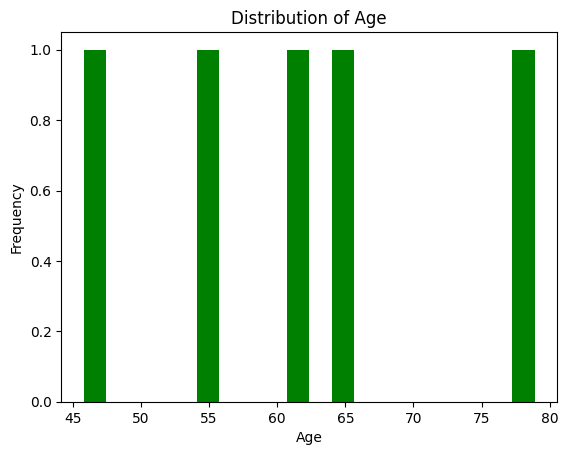

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
BH_PLT= BH.select("age").toPandas()

# Plot the histogram
plt.hist(BH_PLT['age'], bins=20, color='Green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [ ]:
##Percentage of properties with "chas" value of 1
percentage_chas=spark.sql("""
SELECT
    (COUNT(*) * 100.0 / (SELECT COUNT(*) FROM bostonh.bos_housing)) AS percent_chas_1
FROM bostonh.bos_housing  -- Changed table name from boston_housing to bostonh.bos_housing
WHERE chas = 1
""")
percentage_chas.show() # Added to display the result

+----------------+
|  percent_chas_1|
+----------------+
|6.91699604743083|
+----------------+



In [ ]:
# 5.1 Correlation coefficient between "rm" and "medv"
cor_rm_medv=spark.sql("SELECT CORR(rm, medv) AS corr_rm_medv FROM bostonh.bos_housing")
cor_rm_medv.show()

+------------------+
|      corr_rm_medv|
+------------------+
|0.6953599470715401|
+------------------+



In [ ]:
#Investigate if there is any correlation between "ptratio" (pupil-teacher ratio) and "nox" (nitrogen oxide concentration)
cor_ptratio_nox=spark.sql("SELECT CORR(ptratio, nox) AS corr_ptratio_nox FROM bostonh.bos_housing")
cor_ptratio_nox.show()

+-------------------+
|   corr_ptratio_nox|
+-------------------+
|0.18893267711276893|
+-------------------+



In [ ]:
##Write a HiveQL query to identify and display the top 5 neighborhoods with the lowest median home values ("medv").
from pyspark.sql.window import Window
from pyspark.sql.functions import rank

windowSpec  = Window.orderBy("medv")

top_5_neighborhoods = spark.sql("""
SELECT b, medv, rank() OVER (ORDER BY medv ASC) as rank_num
FROM bostonh.bos_housing
""") \
.filter("rank_num <= 5") \
.select("b", "medv")\
.orderBy("b", ascending=False)

top_5_neighborhoods.show()

+------+----+
|     b|medv|
+------+----+
| 396.9| 5.6|
| 396.9| 5.0|
|384.97| 5.0|
|344.05| 7.0|
|338.16| 6.3|
| 88.27| 7.0|
+------+----+



In [ ]:
##average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0.
avg_age_by_chas = spark.sql("""
SELECT chas, AVG(age) AS avg_age
FROM bostonh.bos_housing
GROUP BY chas
""")
avg_age_by_chas.show()

+----+-----------------+
|chas|          avg_age|
+----+-----------------+
|   1|77.50000000000001|
|   0|67.91167728237794|
+----+-----------------+



In [ ]:
##Create a Hive view named "property_age_view" that includes the "age" and "medv" columns.
spark.sql("CREATE OR REPLACE VIEW property_age_view AS SELECT age, medv FROM bostonh.bos_housing")

DataFrame[]

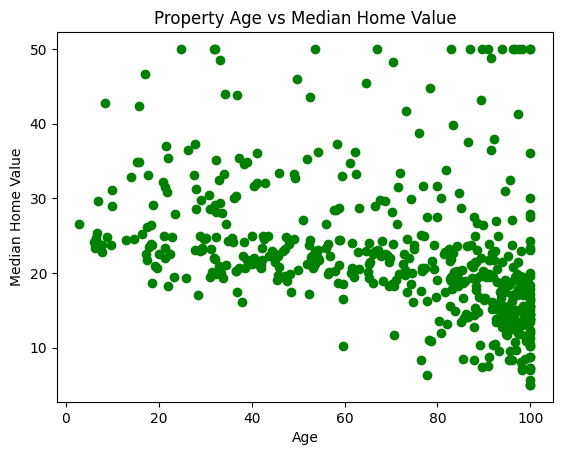

In [ ]:
##Plot a scatter plot of property age against median home value using a data visualization tool of your choice.
BH_PLT = spark.sql("SELECT * FROM property_age_view").toPandas()

plt.scatter(BH_PLT['age'], BH_PLT['medv'], color='Green')
plt.xlabel('Age')
plt.ylabel('Median Home Value')
plt.title('Property Age vs Median Home Value')
plt.show()



**Significance of outliers**
1. Outliers can indicate anomalies, data entry errors, or significant variationsin the data.
2.  Investigating outliers helps understand their origins and potential impact on the analysis.
3. Proper examination reveals whether to include or exclude outliers to maintain data integrity.
4. Careful evaluation of outliers ensures accurate and reliable analysis results.

In [ ]:
###properties with a "crim" value greater than 10 (considered as potential outliers).
outliers = spark.sql("SELECT * FROM bostonh.bos_housing WHERE crim > 10")
outliers.show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

**Hypothesis Testing**

Null Hypothesis (H0): The average number of rooms (rm) does not have a significant impact on the median home value (medv).

Alternative Hypothesis (H1): The average number of rooms (rm) has a significant impact on the median home value (medv).

In [ ]:
# Calculate summary statistics for rm and medv
summary_stats = spark.sql("""
    SELECT
        AVG(rm) AS mean_rm,
        VARIANCE(rm) AS var_rm,
        AVG(medv) AS mean_medv,
        VARIANCE(medv) AS var_medv,
        COUNT(*) AS n
    FROM
        bostonh.bos_housing
""")
summary_stats.show()

+-----------------+-------------------+------------------+----------------+---+
|          mean_rm|             var_rm|         mean_medv|        var_medv|  n|
+-----------------+-------------------+------------------+----------------+---+
|6.284634387351787|0.49367085022110885|22.532806324110698|84.5867235940985|506|
+-----------------+-------------------+------------------+----------------+---+



In [ ]:
# Calculate the t-statistic using the summary statistics
summary_stats.createOrReplaceTempView("summary_stats")

t_stat_calc = spark.sql("""
    SELECT
        mean_rm,
        mean_medv,
        var_rm,
        var_medv,
        n,
        (mean_rm - mean_medv) / SQRT((var_rm / n) + (var_medv / n)) AS t_stat
    FROM summary_stats
""")
t_stat_calc.show()

+-----------------+------------------+-------------------+----------------+---+------------------+
|          mean_rm|         mean_medv|             var_rm|        var_medv|  n|            t_stat|
+-----------------+------------------+-------------------+----------------+---+------------------+
|6.284634387351787|22.532806324110698|0.49367085022110885|84.5867235940985|506|-39.62461149680037|
+-----------------+------------------+-------------------+----------------+---+------------------+



In [ ]:
# Export Results and Calculate P-Value in Python
# Assuming you have the following values from the previous PySpark SQL output
summary_stats_df = summary_stats.toPandas()
t_stat_calc_df = t_stat_calc.toPandas()

mean_rm = summary_stats_df.at[0, 'mean_rm']
mean_medv = summary_stats_df.at[0, 'mean_medv']
var_rm = summary_stats_df.at[0, 'var_rm']
var_medv = summary_stats_df.at[0, 'var_medv']
n = summary_stats_df.at[0, 'n']
t_stat = t_stat_calc_df.at[0, 't_stat']

# Degrees of freedom
df = n - 2

# Calculate the p-value
import scipy.stats as stats
p_value = stats.t.sf(abs(t_stat), df) * 2

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Determine the significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant impact of the average number of rooms on the median home value.")
else:
    print("Fail to reject the null hypothesis. There is no significant impact of the average number of rooms on the median home value.")

T-Statistic: -39.62461149680037, P-Value: 6.047544328582182e-157
Reject the null hypothesis. There is a significant impact of the average number of rooms on the median home value.
